<a href="https://colab.research.google.com/github/joaohl19/Projeto_Clustering/blob/main/projeto_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulos

In [ ]:
!pip install -U scikit-fuzzy
!pip install fuzzy-c-means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import skfuzzy as fuzz
import copy

from matplotlib.colors import ListedColormap
from fcmeans import FCM
from __future__ import division, print_function
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.cluster import AffinityPropagation

# Preparo dos dados

In [ ]:
colunas = ["temporada", "idade", "doenca", "acidente", "cirurgia", "febre", "alcool","fumo","t_sentado", "diagnostico"]

dataset = pd.read_csv('fertility_Diagnosis.txt')
dataset.to_csv('fertility_Diagnosis.csv', index = False)
dataset.columns = colunas
dataset

,temporada,idade,doenca,acidente,cirurgia,febre,alcool,fumo,t_sentado,diagnostico
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
...,...,...,...,...,...,...,...,...,...,...
94,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
95,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
96,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
97,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


### Legenda

**temporada**:
- inverno: -1
- primavera: -0.33
- verão: 0.33
- outono: 1

**idade**:

idade entre 18 e 36 anos: normalizada (0-1)


**doença**:

presença de doenças na infância, como varicela, caxumba, poliomielite: binário

**acidente**:
acidente ou trauma sério: binário

**cirurgia**:

já sofreu intervenção cirúrgica: binário

**febre**
febre alta no último ano:

- -1: menos de 3 meses atrás

- 0: não

- 1: mais de 3 meses atrás

**álcool**:
frequência de consumo de álcool: normalizada (0-1)


**fumo**:
hábito de fumo: normalizado (-1 : 1)

**t_sentado**:
número de horas passadas sentadas por dia: normalizadas (0-1)

**diagnostico**:
- normal: N
- alterado: O

In [ ]:
dataset.describe(include = "all")

,temporada,idade,doenca,acidente,cirurgia,febre,alcool,fumo,t_sentado,diagnostico
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87
mean,-0.076364,0.668788,0.878788,0.434343,0.505051,0.191919,0.832323,-0.353535,0.402020,NaN
std,0.800374,0.121917,0.328035,0.498193,0.502519,0.583389,0.168322,0.812066,0.181079,NaN
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000,NaN
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000,NaN
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000,NaN
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000,NaN


## Extraindo variáveis dependentes e independentes

In [ ]:
features = dataset.iloc[0:, 0:9] # todas as linhas, colunas exceto label
target = dataset.iloc[0:, -1] # todas as linhas, só coluna com label
target


0     O
1     N
2     N
3     O
4     N
     ..
94    N
95    N
96    N
97    N
98    N
Name: diagnostico, Length: 99, dtype: object

# K-means

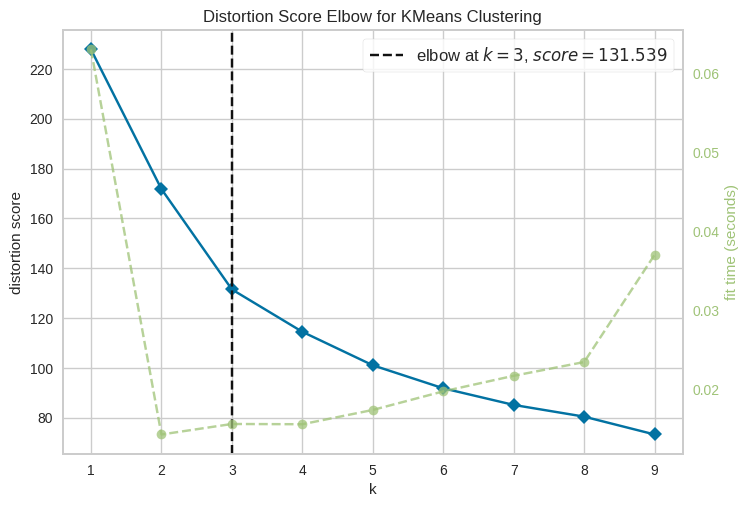

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Usando o método Elbow para achar o número ideal de clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(features)
visualizer.poof()

## Métricas K-means

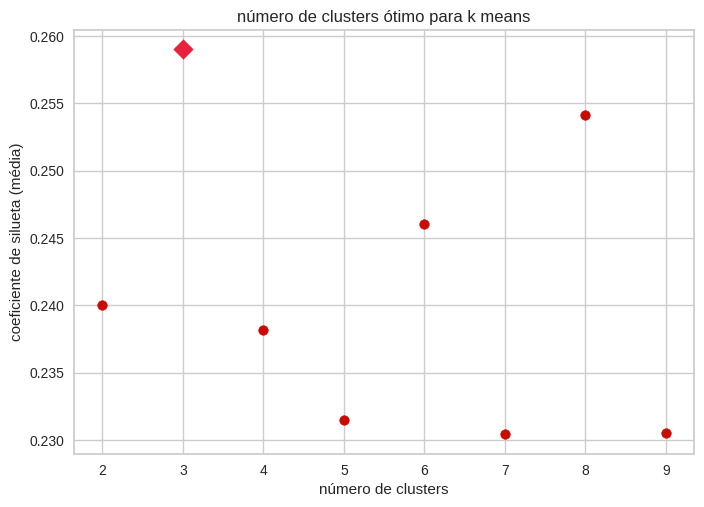

In [ ]:
n = []
s = []

# testando número ótimo de clusters
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(features)
  cluster_labels = kmeans.fit_predict(features)
  silhouette_avg = metrics.silhouette_score(features, cluster_labels)
  n.append(i)
  s.append(silhouette_avg)

# gráfico número de clusters vs silueta
plt.scatter(x=n, y=s, alpha=1, color = 'r')

# rótulos
plt.title("Número de clusters ótimo")
plt.xlabel("número de clusters")
plt.ylabel("coeficiente de silhueta (média)")

#destacar ponto máximo
plt.scatter(x=n[1],y=s[1], marker="D", s=100, color='#E8223D')

In [ ]:
# Aplicando o modelo para número de clusters igual a 3, conforme indicado pelo método Elbow e visando maximizar a silhueta
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

kmeans.cluster_centers_

array([[ 0.92821429,  0.66964286,  0.78571429,  0.28571429,  0.53571429,
         0.07142857,  0.82142857, -0.75      ,  0.39714286],
       [-0.67244444,  0.66733333,  0.88888889,  0.42222222,  0.53333333,
         0.35555556,  0.85333333, -0.77777778,  0.41177778],
       [-0.12653846,  0.67038462,  0.96153846,  0.61538462,  0.42307692,
         0.03846154,  0.80769231,  0.80769231,  0.39038462]])

In [ ]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity = purity_score(target, cluster_labels)
print(purity)

0.8787878787878788


## Gráficos K-means

In [ ]:
x = features.values
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Text(0, 0.5, 'idade')

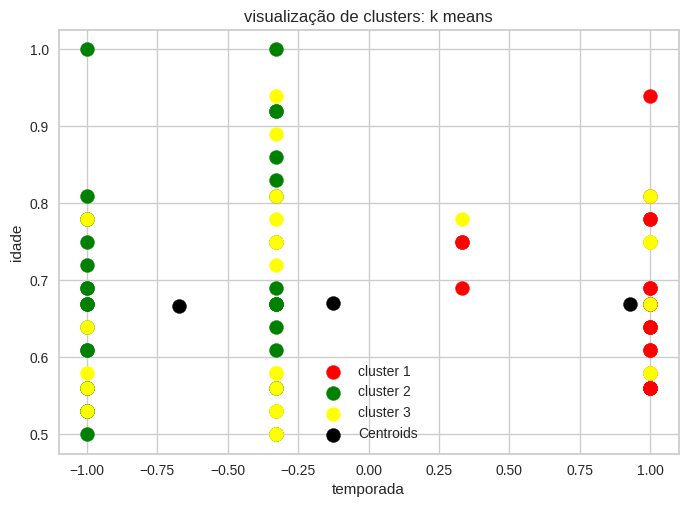

In [ ]:
# Mostra todos os clusters com sua respectiva cor e label após a clusterização
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100,  c = 'yellow', label = 'cluster 3')

# Centros de cada cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

plt.title("Visualização de clusters")
plt.xlabel("temporada")
plt.ylabel("idade")

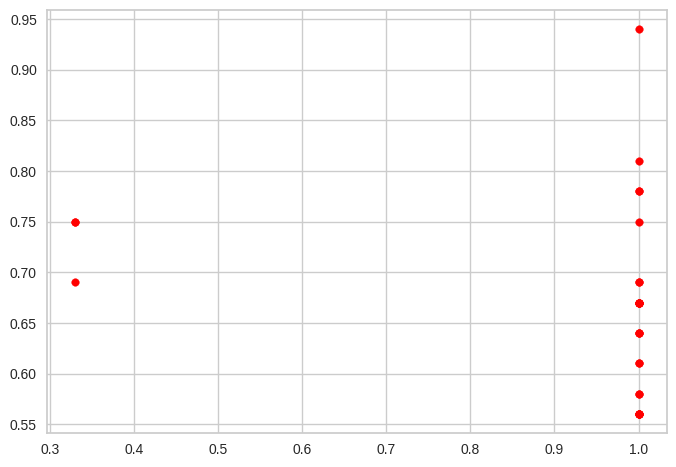

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 30, c = 'red', label = 'cluster 1')
plt.show()

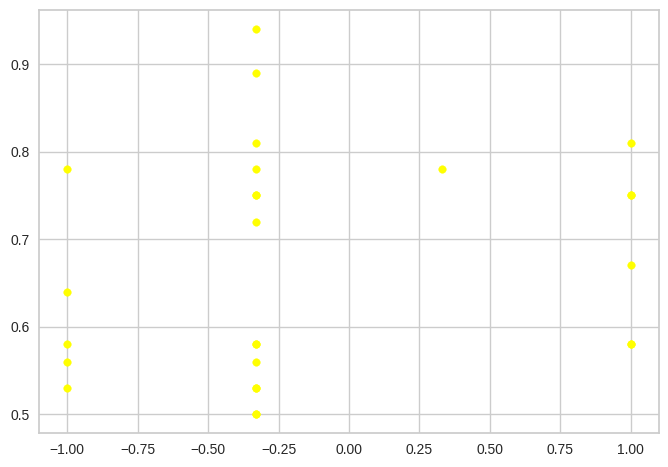

In [ ]:
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 30, c = 'yellow', label = 'cluster 3')

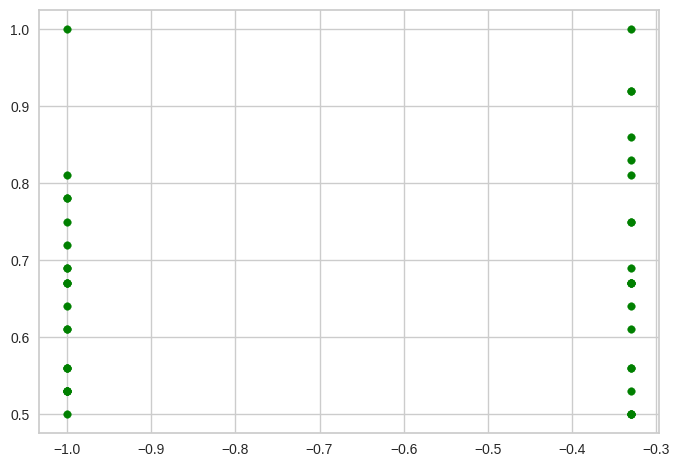

In [ ]:
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 30, c = 'green', label = 'cluster 2' )

plt.show()

# C-means


## Modificando estruturas de dados

In [ ]:
# df: novo dataframe com variáveis inteiras
df = dataset.copy()

# diagnóstico vira dummy variable (coluna N, coluna O)
df = pd.get_dummies(df)

temp = (df.iloc[0:,-2]) # labels vão ser normal (1) ou alterado (0)
#guarda rótulos corretos
features2 = copy.deepcopy(temp)

# multiplica por 100 para não perder duas casas de decimais quando truncar para inteiro
for (columnName, columnData) in df.items():
    columnData *= 100

# setar todas as colunas como inteiros
df = df.astype('int32')

# gera objeto ndarray (matriz do numpy)
X = df.to_numpy()

# Modelo c-means

In [ ]:
# modelo fuzzy c means
fcm = FCM(n_clusters=2)
fcm.fit(X)

# saídas
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

## Visualizações c-means

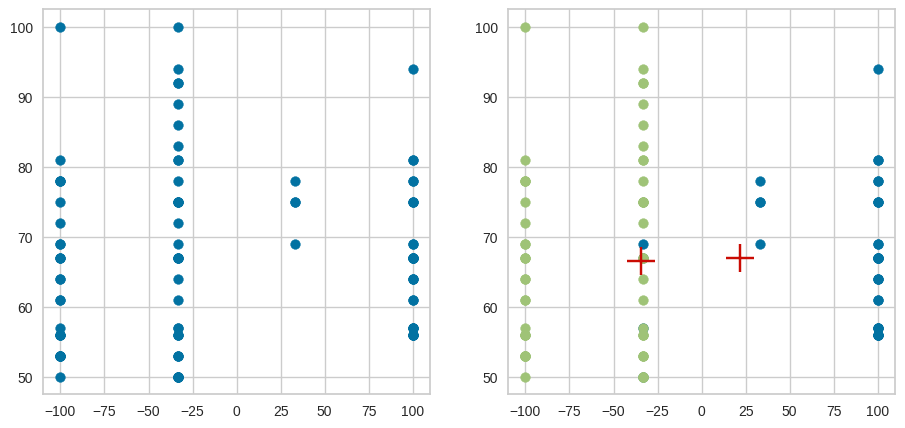

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(11,5))

# Mapa de cores
colors = ['b', 'g','w','m']

# Mostrar os dados originais sem as labels
axes[0].scatter(X[:, 0], X[:, 1], alpha=1, color=colors[0])

# Mostrar os dados com cores diferentes após a clusterização, de acordo com as labels
for label in set(fcm_labels):
    axes[1].scatter(X[fcm_labels == label, 0], X[fcm_labels == label, 1], alpha=1, color=colors[label])

# Mostrar os centros de cada cluster no segundo gráfico
axes[1].scatter(fcm_centers[:, 0], fcm_centers[:, 1], marker="+", s=400, color='r')

plt.show()

Gráfico à esquerda: dados

Gráfico à direita: clusters formados - azul e verde (com centroides em vermelho)


## Métricas c-means

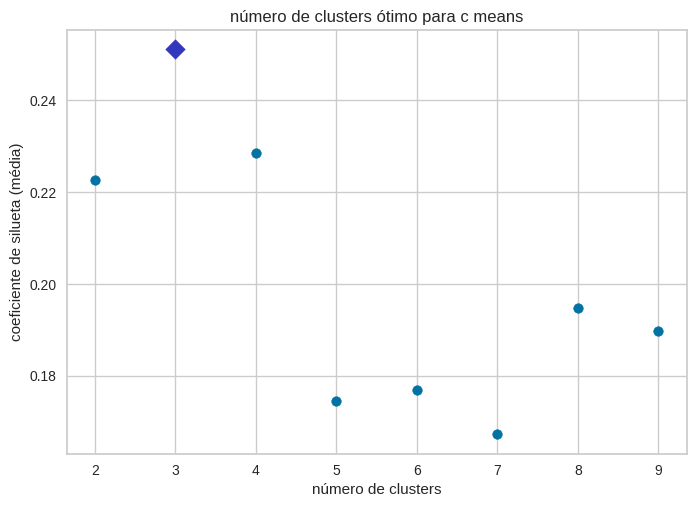

In [ ]:
# n de clusters
n = []
# silhueta correspondente
s = []

# fuzzy cmeans para i = [2:10]
for i in range(2,10):
  # roda fuzzy cmeans
  fcm = FCM(n_clusters=i)
  fcm.fit(X)
  fcm_labels = fcm.predict(X)
  silhouette_avg = metrics.silhouette_score(features, fcm_labels)
  n.append(i)
  s.append(silhouette_avg)

# gráfico n x silueta
plt.scatter(x=n, y=s, alpha=1, color = 'b')

# rótulos
plt.title("número de clusters ótimo para c means")
plt.xlabel("número de clusters")
plt.ylabel("coeficiente de silueta (média)")

# destacar ponto máximo
plt.scatter(x=n[1],y=s[1], marker="D", s=100, color='#3238bb')

plt.show()

# DBSCAN

## Subconjuntos da base de dados que também vão ser usados no DBSCAN

In [ ]:
x = dataset.loc[:, ["temporada", "idade"]].values
x_clustered =  dataset.loc[:,["temporada", "idade"]]

In [ ]:
y = dataset.loc[:, ["t_sentado", "idade",]].values
y_clustered = dataset.loc[:, ["t_sentado", "idade",]]

In [ ]:
z = dataset.loc[:, ["alcool", "idade",]].values
z_clustered = dataset.loc[:, ["alcool", "idade",]]

## Método k-distance-graph


In [ ]:
# Método k-distance-graph baseado na distância média para os k-vizinhos mais próximos para determinar o melhor valor de épsilon
neighb = NearestNeighbors(n_neighbors=2)

nbrs_x=neighb.fit(x)
distances_x,indices=nbrs_x.kneighbors(x)

nbrs_y=neighb.fit(y)
distances_y,indices=nbrs_y.kneighbors(y)

nbrs_z=neighb.fit(z)
distances_z,indices=nbrs_z.kneighbors(z)

nbrs=neighb.fit(features.values)
distances__,indices=nbrs.kneighbors(features.values)

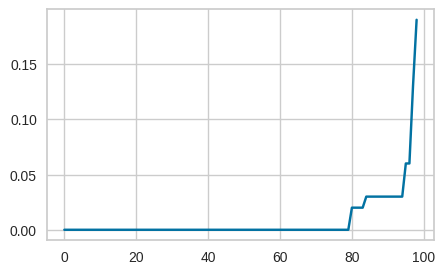

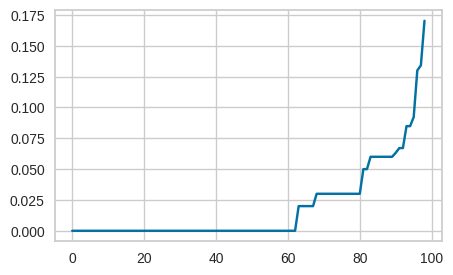

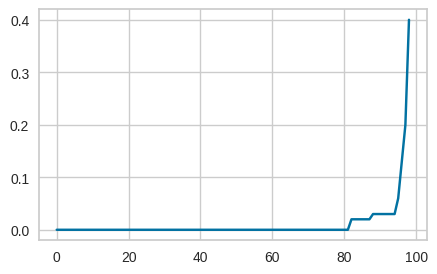

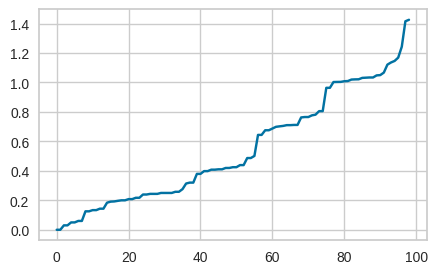

In [ ]:
array_distances = [distances_x, distances_y, distances_z, distances__]
for i in array_distances:
  distances = np.sort(i, axis = 0)
  distances = distances[:, 1]
  fig2, (axes) = plt.subplots(1,1,figsize=(5, 3))
  plt.plot(distances)


## Modelos DBSCAN

### Modelo DBSCAN de X + Gráficos + Silhueta


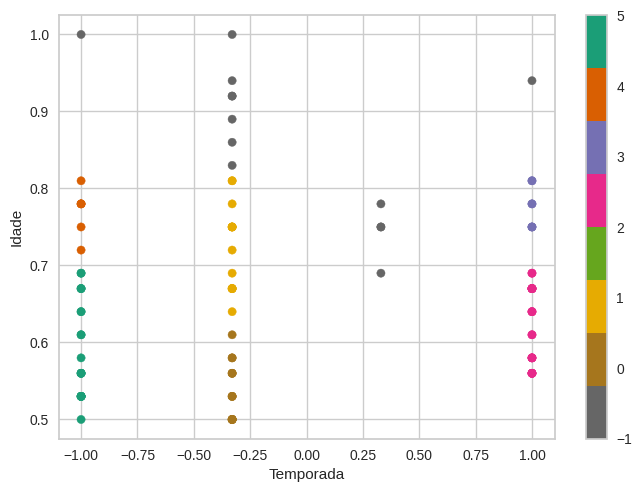

,DBSCAN_size
Cluster,
-1,13
0,15
1,14
2,23
3,7
4,6
5,21


In [ ]:
# Modelo DBSCAN de X
model_x = DBSCAN(eps = 0.032, min_samples = 5).fit(x)
labels_x = model_x.labels_

# Gráfico de X
plt.scatter(x[:, 0], x[:,1], c = labels_x, cmap= "Dark2_r", s = 35) # plotting the clusters
plt.colorbar() # plotting colobar with the corresponding color of each cluster
plt.xlabel("Temporada") # X-axis label
plt.ylabel("Idade") # Y-axis label
plt.show() # showing the plot

# Tabela de X com os clusters e o números de pontos pertencentes
x_clustered.loc[:, 'Cluster'] = labels_x
x_clust_sizes = x_clustered.groupby('Cluster').size().to_frame()
x_clust_sizes.columns = ["DBSCAN_size"]
x_clust_sizes


In [ ]:
silhouette_avg_x = metrics.silhouette_score(x_clustered, labels_x)
silhouette_avg_x

0.8901254196649389

### Modelo DBSCAN de Y + Gráficos + Silhueta

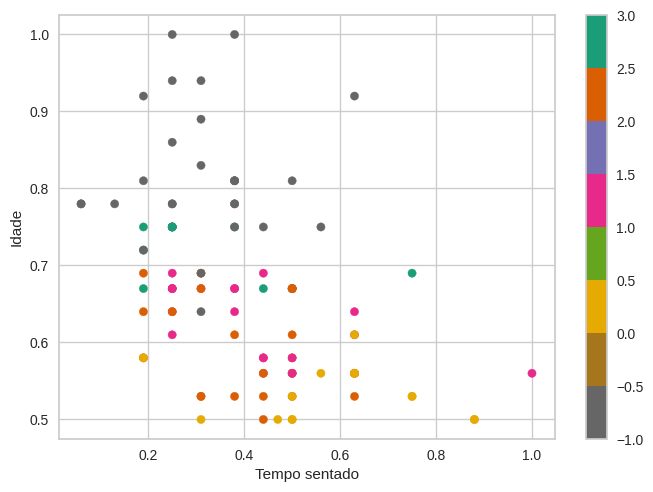

,DBSCAN_size
Cluster,
-1,30
0,15
1,23
2,21
3,10


In [ ]:
# Modelo DBSCAN de Y
model_y = DBSCAN(eps = 0.06, min_samples = 9).fit(x)
labels_y = model_y.labels_

# Gráfico de Y
plt.scatter(y[:, 0], y[:,1], c = labels_y, cmap= "Dark2_r", s = 35) # Mostrando os clusters
plt.colorbar()
plt.xlabel("Tempo sentado")
plt.ylabel("Idade")
plt.show()

# Tabela de Y com os clusters e o números de pontos pertencentes
y_clustered.loc[:, 'Cluster'] = labels_y
y_clust_sizes = y_clustered.groupby('Cluster').size().to_frame()
y_clust_sizes.columns = ["DBSCAN_size"]
y_clust_sizes

In [ ]:
silhouette_avg_y = metrics.silhouette_score(y_clustered, labels_y)
silhouette_avg_y

0.8022321477913041

### Modelo DBSCAN de Z + Gráficos + Silhueta

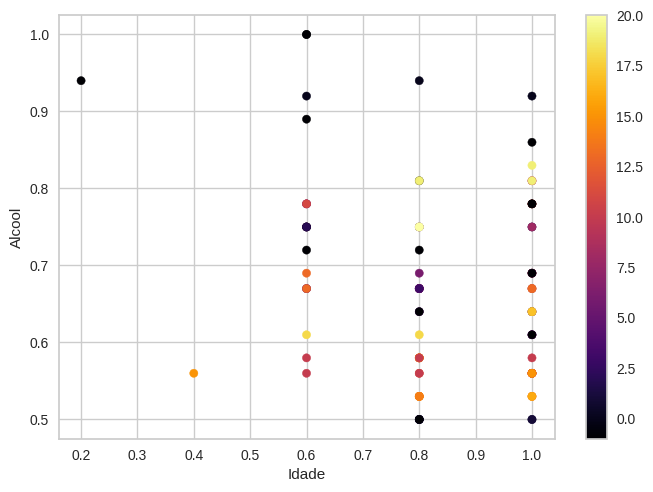

,DBSCAN_size
Cluster,
-1,15
0,3
1,6
2,4
3,5
4,3
5,2
6,9
7,2


In [ ]:
# Modelo DBSCAN de Z
model_z = DBSCAN(eps = 0.025, min_samples = 2).fit(x)
labels_z = model_z.labels_

# Gráfico de Z
plt.scatter(z[:, 0], z[:,1], c = labels_z, cmap= "inferno", s = 35) # plotting the clusters
plt.colorbar()
plt.xlabel("Idade")
plt.ylabel("Alcool")
plt.show()

# Tabela com os clusters e o números de pontos pertencentes
z_clustered.loc[:, 'Cluster'] = labels_z
z_clust_sizes = z_clustered.groupby('Cluster').size().to_frame()
z_clust_sizes.columns = ["DBSCAN_size"]
z_clust_sizes

In [ ]:
silhouette_avg_z = metrics.silhouette_score(z_clustered, labels_z)
silhouette_avg_z

0.8246808249011983

### Modelo DBSCAN da base de dados completa + Gráficos + Silhueta + Pureza

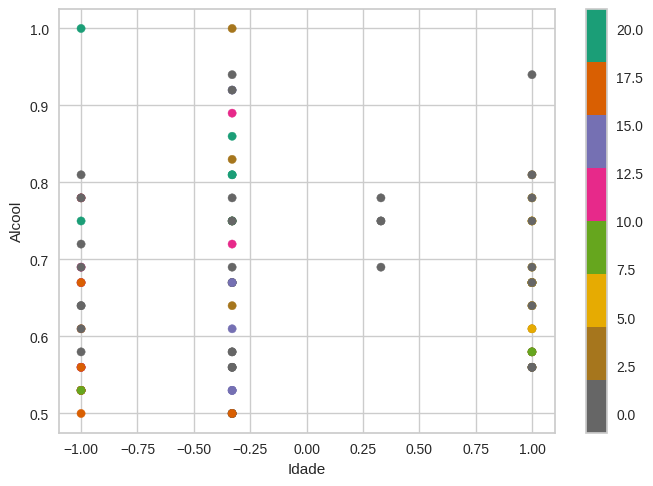

,DBSCAN_size
Cluster,
-1,44
0,2
1,2
2,4
3,3
4,4
5,2
6,2
7,5


In [ ]:
# Modelo considerando todos os dados
model = DBSCAN(eps = 0.50, min_samples = 2).fit(features)
labels = model.labels_

# Gráfico
plt.scatter(features.values[:, 0], features.values[:,1], c = labels, cmap= "Dark2_r", s = 35)
plt.colorbar()
plt.xlabel("Idade")
plt.ylabel("Alcool")
plt.show()

# Tabela com os clusters e o números de pontos pertencentes
features.loc[:, 'Cluster'] = labels
clust_sizes = features.groupby('Cluster').size().to_frame()
clust_sizes.columns = ["DBSCAN_size"]
clust_sizes


In [ ]:
silhouette_avg = metrics.silhouette_score(features, labels)
silhouette_avg

0.4774581677262648

In [ ]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity = purity_score(target, labels)
print(purity)

0.8787878787878788
